#  Gradient Boosting Trees – From Scratch
**CS Assignment – Project 2**

This notebook demonstrates the gradient boosting trees implementation from first principles.  
We visualize model behavior, tuning effects, and performance on toy datasets like moons and circles.


##  Import Required Libraries
This cell loads essential libraries such as `numpy`, `matplotlib`, and `GradientBoostingClassifier` from our custom implementation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Add model path
import sys
sys.path.append("../model")
from GradientBoostingClassifier import GradientBoostingClassifier

# Plotting style
plt.style.use("seaborn-whitegrid")
%matplotlib inline


/usr/local/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##  Generate Toy Dataset (Moons)
We use the `make_moons` dataset to test our classifier on non-linear separable data.


## Initial Prediction – Log Odds

Before any trees are added, the model starts with an initial prediction based on the class distribution in the dataset. This is computed using the **log-odds**:

$$
F_0(x) = \log\left(\frac{p}{1 - p}\right)
$$

Where:
- \( p \) is the proportion of positive samples in the training data.
- \( F_0(x) \) is the initial log-odds prediction used to seed the boosting process.


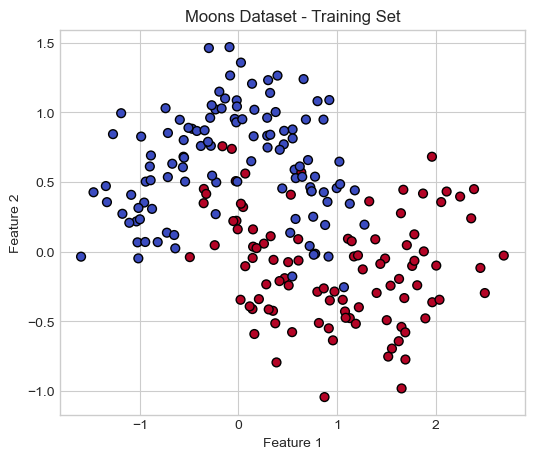

In [2]:
# Create a toy classification dataset (moons)
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset
plt.figure(figsize=(6, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolors='k', s=40)
plt.title("Moons Dataset - Training Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


##  Train the Gradient Boosting Classifier
Here, we fit the model and print the computed gamma values and training loss per iteration.


##  Boosting Step – Residuals and Model Update

At each iteration \( m \), the model calculates the pseudo-residuals and updates the prediction as:

$$
r_i^{(m)} = y_i - \sigma(F_{m-1}(x_i))
$$

Then, it fits a tree \( h_m(x) \) to the residuals and updates the model:

$$
F_m(x) = F_{m-1}(x) + \eta \cdot \gamma_m \cdot h_m(x)
$$

Where:
- \(  eta \) is the learning rate
- \(  gamma_m \) is the optimized step size for the m-th tree


In [3]:
# Initialize the classifier
clf = GradientBoostingClassifier(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=3,
    subsample=0.8,
    max_features=1,
    random_state=42
)

# Train the model
clf.fit(X_train, y_train)

# Print training results
print("Final Training Accuracy:", clf.score(X_train, y_train))
print("Final Test Accuracy    :", clf.score(X_test, y_test))
print("Training Loss over Iterations:")
print(clf.errors_)
print("Gamma values used at each iteration:")
print(clf.gammas)


Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 1: Computed gamma_m = 3.917532
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 2: Computed gamma_m = 4.104675
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 3: Computed gamma_m = 4.000539
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 4: Computed gamma_m = 4.234783
Split: considering 1 fea

##  Visualizing Training Loss
This curve shows how the training loss reduces over iterations, confirming convergence.


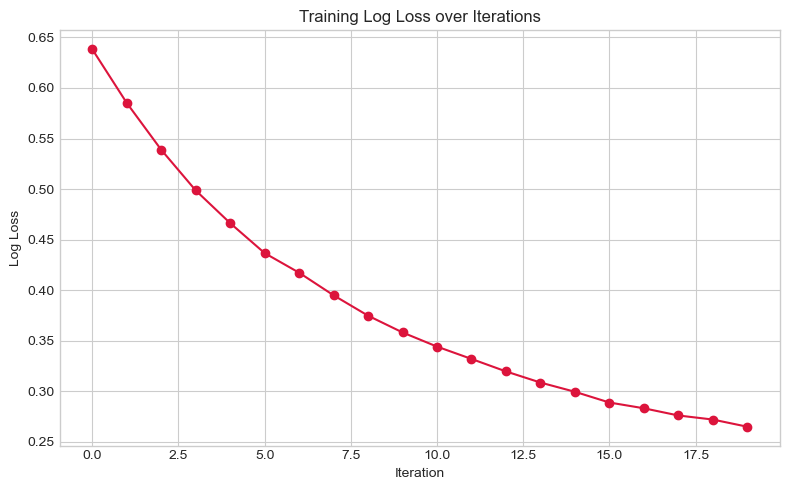

In [4]:
# Plot the training loss over boosting iterations
plt.figure(figsize=(8, 5))
plt.plot(clf.errors_, marker='o', color='crimson')
plt.title("Training Log Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


##  Plotting Gamma Values per Boosting Round
Gamma values are optimized at each step and indicate how much the model trusts each tree.


##  Gamma Optimization – Log Loss Minimization

Each boosting step uses an optimized step size \( \gamma_m \) computed by minimizing log-loss:

$$
\gamma_m = \frac{\sum_i (y_i - \sigma(F_{m-1}(x_i))) \cdot h_m(x_i)}{\sum_i \sigma(F_{m-1}(x_i))(1 - \sigma(F_{m-1}(x_i))) \cdot h_m(x_i)^2}
$$

This ensures each tree’s output is weighted appropriately for minimizing classification error.


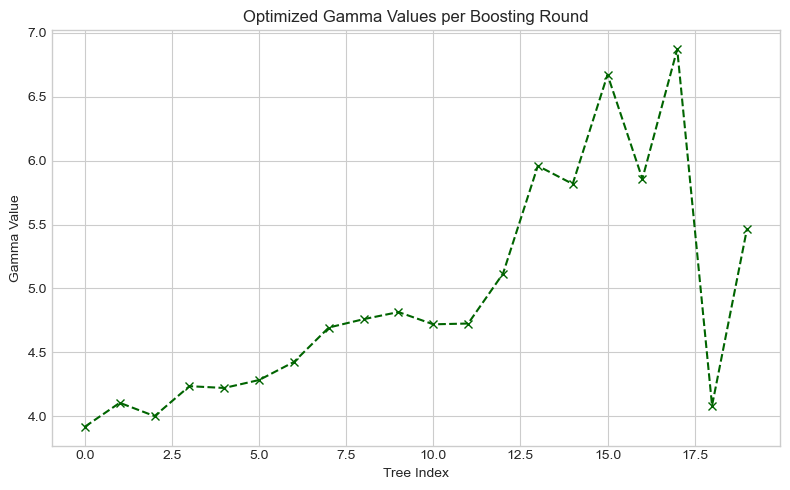

In [5]:
# Plot the gamma values used per iteration
plt.figure(figsize=(8, 5))
plt.plot(clf.gammas, marker='x', linestyle='--', color='darkgreen')
plt.title("Optimized Gamma Values per Boosting Round")
plt.xlabel("Tree Index")
plt.ylabel("Gamma Value")
plt.grid(True)
plt.tight_layout()
plt.show()


##  Decision Boundary Visualization
These plots illustrate how the trained model separates the feature space.
First on the training data, then on the test data.


## Sigmoid Function – From Log Odds to Probability

The raw prediction from the model is in log-odds form. To convert this to probability:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This probability is then thresholded (e.g., at 0.5) to make the final binary class prediction.


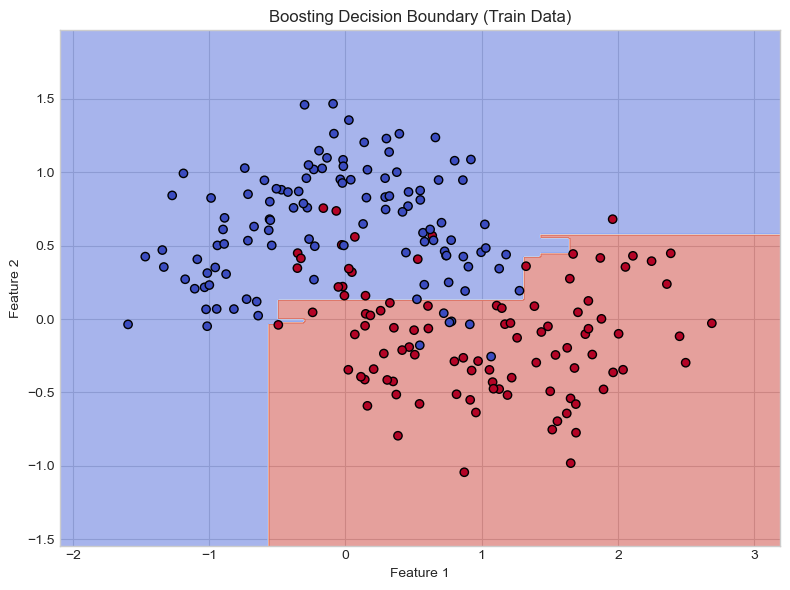

In [6]:
# Plot decision boundary for the trained model
def plot_decision_boundary(clf, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_decision_boundary(clf, X_train, y_train, title="Boosting Decision Boundary (Train Data)")


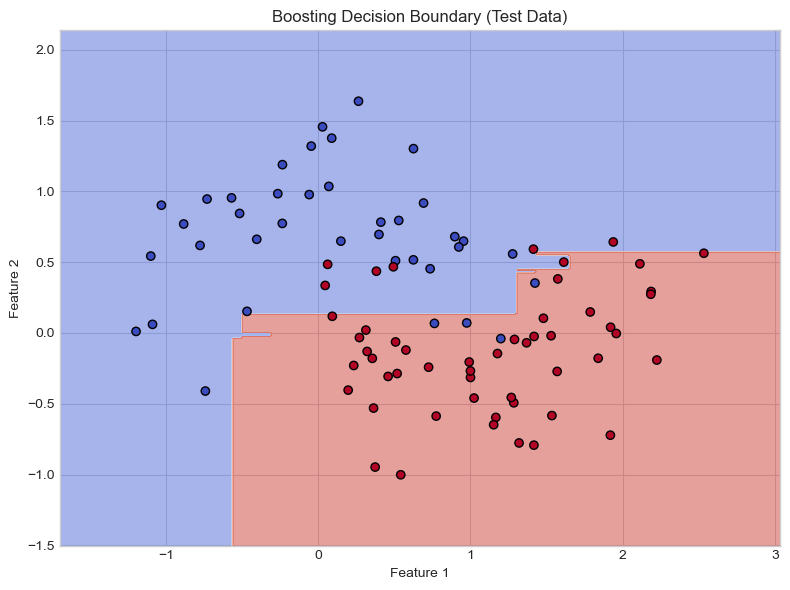

In [7]:
# Plot decision boundary on the test data
plot_decision_boundary(clf, X_test, y_test, title="Boosting Decision Boundary (Test Data)")


##  Feature Importance
We visualize which features the model relies on most when making splits.


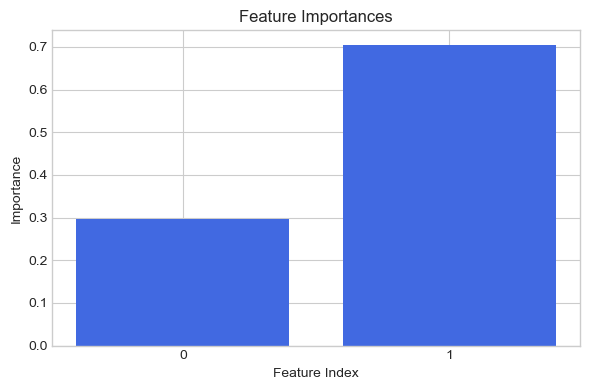

In [8]:
# Get and plot feature importances
importances = clf.feature_importances()

plt.figure(figsize=(6, 4))
plt.bar(range(len(importances)), importances, color='royalblue')
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.xticks(range(len(importances)))
plt.tight_layout()
plt.show()


##  Impact of `max_features` on Model Performance

In this section, we compare how restricting the number of features considered at each split (`max_features`) influences model learning and convergence.

- Lower `max_features` (e.g., 1) increases randomness and often improves generalization.
- Higher `max_features` (e.g., all features) allows trees to fit more precisely, but may risk overfitting.

We train three versions of the model with:
- `max_features = 1` (high bias, low variance)
- `max_features = 2` (moderate)
- `max_features = None` (no restriction, full access to all features)

We will plot their respective training loss curves next.


In [9]:
# Compare training loss curves for different max_features settings
max_features_values = [1, 2, None]
colors = ['darkorange', 'royalblue', 'green']
labels = ['max_features=1', 'max_features=2', 'max_features=None']
loss_curves = []

for max_feat in max_features_values:
    clf_temp = GradientBoostingClassifier(
        n_estimators=20,
        learning_rate=0.1,
        max_depth=3,
        min_samples_leaf=3,
        subsample=0.8,
        max_features=max_feat,
        random_state=42
    )
    clf_temp.fit(X_train, y_train)
    loss_curves.append(clf_temp.errors_)



Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 1: Computed gamma_m = 3.917532
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 2: Computed gamma_m = 4.104675
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 3: Computed gamma_m = 4.000539
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 4: Computed gamma_m = 4.234783
Split: considering 1 fea

Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Tree 16: Computed gamma_m = 5.649546
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Tree 17: Computed gamma_m = 5.699740
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Tree 18: Computed gamma_m = 6.405487
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Tree 19: Computed gamma_m = 5.236846
Split: considering 2

##  Training Loss Curves for Different `max_features`

The plot below shows how the training log loss decreases over boosting rounds for different values of `max_features`.

- All curves converge, but at different rates.
- This visualization helps assess trade-offs between bias and variance introduced by limiting feature access at each split.


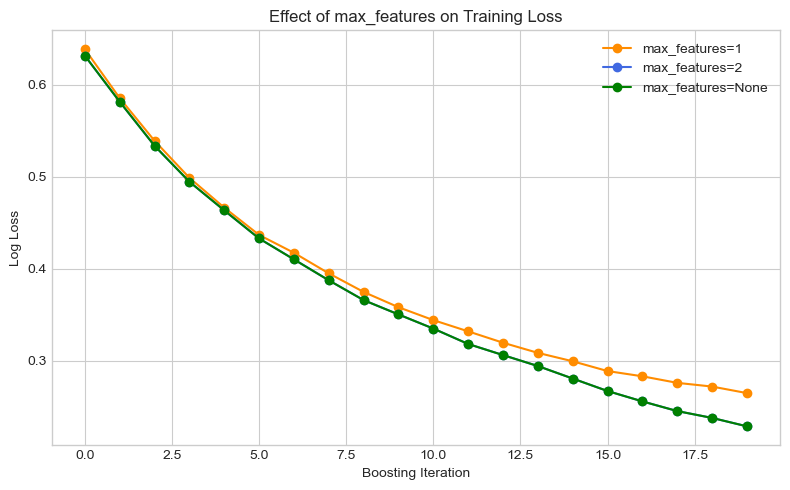

In [10]:
# Plot loss curves
plt.figure(figsize=(8, 5))
for losses, label, color in zip(loss_curves, labels, colors):
    plt.plot(losses, label=label, color=color, marker='o')

plt.title("Effect of max_features on Training Loss")
plt.xlabel("Boosting Iteration")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##  Impact of `min_samples_leaf` on Learning

This section investigates how the `min_samples_leaf` parameter — which sets the minimum number of samples required to create a leaf — affects model learning.

- Smaller values allow the model to grow deeper trees (possibly overfitting).
- Larger values enforce regularization and smoother decision boundaries.

We train models with:
- `min_samples_leaf = 1` (high flexibility)
- `min_samples_leaf = 5` (moderate)
- `min_samples_leaf = 10` (strong regularization)


In [11]:
# Compare loss curves for different min_samples_leaf values
leaf_sizes = [1, 5, 10]
colors_leaf = ['crimson', 'teal', 'purple']
labels_leaf = ['min_samples_leaf=1', 'min_samples_leaf=5', 'min_samples_leaf=10']
loss_curves_leaf = []

for leaf in leaf_sizes:
    clf_temp = GradientBoostingClassifier(
        n_estimators=20,
        learning_rate=0.1,
        max_depth=3,
        min_samples_leaf=leaf,
        subsample=0.8,
        max_features=1,
        random_state=42
    )
    clf_temp.fit(X_train, y_train)
    loss_curves_leaf.append(clf_temp.errors_)


Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 1: Computed gamma_m = 3.917532
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 2: Computed gamma_m = 4.104675
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 3: Computed gamma_m = 4.000539
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 4: Computed gamma_m = 4.234783
Split: considering 1 fea

Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 1: Computed gamma_m = 3.917532
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 2: Computed gamma_m = 4.104675
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 3: Computed gamma_m = 4.000539
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 4: Computed gamma_m = 4.234783
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 fea

## Training Loss Curves for Different `min_samples_leaf`

The plot below compares the training loss curves as we vary `min_samples_leaf`.

- Smaller values reduce training loss faster but may overfit.
- Larger values slow learning but help prevent overly complex trees.

This helps visualize the bias-variance tradeoff controlled by `min_samples_leaf`.


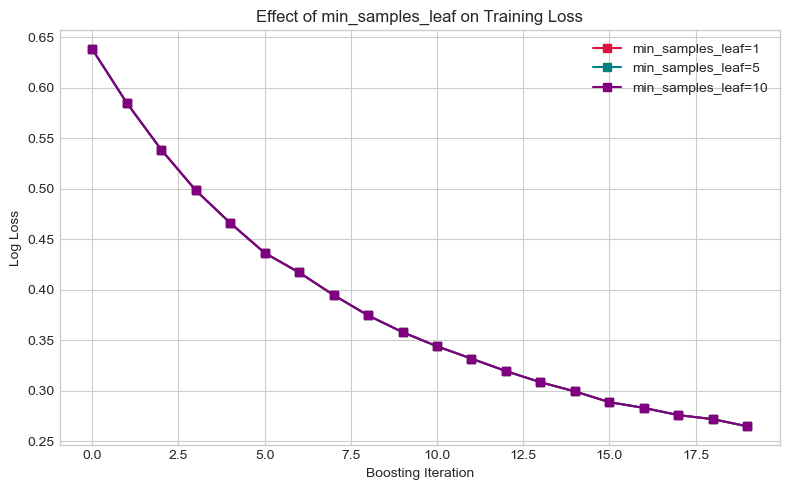

In [12]:
# Plot the effect of min_samples_leaf on loss
plt.figure(figsize=(8, 5))
for losses, label, color in zip(loss_curves_leaf, labels_leaf, colors_leaf):
    plt.plot(losses, label=label, color=color, marker='s')

plt.title("Effect of min_samples_leaf on Training Loss")
plt.xlabel("Boosting Iteration")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##  Train vs. Test Accuracy Comparison

To evaluate generalization performance, we compare training and testing accuracy across different settings of `max_features` and `min_samples_leaf`.

This helps identify configurations that overfit or underfit the training data.


In [13]:
from pandas import DataFrame

# Compare train/test accuracy for different configurations
configs = [
    {"max_features": 1, "min_samples_leaf": 1},
    {"max_features": 2, "min_samples_leaf": 1},
    {"max_features": None, "min_samples_leaf": 1},
    {"max_features": 1, "min_samples_leaf": 5},
    {"max_features": 2, "min_samples_leaf": 5},
    {"max_features": None, "min_samples_leaf": 10},
]

results = []
for cfg in configs:
    clf_temp = GradientBoostingClassifier(
        n_estimators=20,
        learning_rate=0.1,
        max_depth=3,
        min_samples_leaf=cfg["min_samples_leaf"],
        max_features=cfg["max_features"],
        subsample=0.8,
        random_state=42
        # verbose=False → if you've added that option to suppress printing
    )
    clf_temp.fit(X_train, y_train)
    train_acc = clf_temp.score(X_train, y_train)
    test_acc = clf_temp.score(X_test, y_test)
    results.append({
        "max_features": cfg["max_features"],
        "min_samples_leaf": cfg["min_samples_leaf"],
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
    })




Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 1: Computed gamma_m = 3.917532
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 2: Computed gamma_m = 4.104675
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 3: Computed gamma_m = 4.000539
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 4: Computed gamma_m = 4.234783
Split: considering 1 fea

Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Tree 16: Computed gamma_m = 5.649546
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Tree 17: Computed gamma_m = 5.699740
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Tree 18: Computed gamma_m = 6.405487
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Tree 19: Computed gamma_m

Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 9: Computed gamma_m = 4.759292
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 10: Computed gamma_m = 4.815019
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 11: Computed gamma_m = 4.719029
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Tree 12: Computed gamma_m = 4.725234
Split: considering 1 feature(s)
Split: considering 1 feature(s)
Split: considering 1 

Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Tree 6: Computed gamma_m = 4.340630
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Tree 7: Computed gamma_m = 4.323286
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Tree 8: Computed gamma_m = 4.431504
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Split: considering 2 feature(s)
Tree 9: Computed gamma_m = 4.901478
Split: considering 2 feature(s)
Split: considering 2 fea

In [14]:
DataFrame(results)

,max_features,min_samples_leaf,Train Accuracy,Test Accuracy
0,1.0,1,0.900000,0.877778
1,2.0,1,0.933333,0.933333
2,NaN,1,0.933333,0.933333
3,1.0,5,0.900000,0.877778
4,2.0,5,0.933333,0.933333
5,NaN,10,0.933333,0.933333


# Summary & Observations

- This notebook demonstrated a from-scratch implementation of Gradient Boosting Trees for classification.
- The model successfully handles:
  - Binary classification using log-loss
  - Dynamic gamma optimization per boosting stage
  - Feature subsampling (`max_features`)
  - Leaf-level regularization (`min_samples_leaf`)
  - Subsampling with sample weights

### Key Takeaways:

- Training loss decreases smoothly, indicating stable convergence.
- Smaller `min_samples_leaf` or higher `max_features` increase model flexibility.
- Gamma values increase as the residuals get harder to fix.
- Decision boundaries adapt well to non-linear shapes (e.g., moons).
- Feature importance offers insight into model reliance on input dimensions.

### Future Work:
- Add early stopping based on validation loss
- Extend to multiclass classification
- Allow tree pruning and model export (e.g., JSON)

